In [1]:
#importing sll the important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as conm

In [93]:
#loading dataset
df=pd.read_csv('heart_disease.csv')

In [94]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [99]:
#creating new dataframe as per our requirement to predict the target variable
df_new=df[['age','cigsPerDay','diabetes','totChol','sysBP','diaBP','glucose','TenYearCHD']]

In [105]:
df_new.head()

,age,cigsPerDay,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,39,0.0,0,195.0,106.0,70.0,77.0,0
1,46,0.0,0,250.0,121.0,81.0,76.0,0
2,48,20.0,0,245.0,127.5,80.0,70.0,0
3,61,30.0,0,225.0,150.0,95.0,103.0,1
4,46,23.0,0,285.0,130.0,84.0,85.0,0


In [106]:
#the number of null values are very less so we drop all the rows with null values
df_new.dropna(inplace=True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_new.head()

,age,cigsPerDay,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,39,0.0,0,195.0,106.0,70.0,77.0,0
1,46,0.0,0,250.0,121.0,81.0,76.0,0
2,48,20.0,0,245.0,127.5,80.0,70.0,0
3,61,30.0,0,225.0,150.0,95.0,103.0,1
4,46,23.0,0,285.0,130.0,84.0,85.0,0


In [107]:
#creating x(independant variable) and y(target variable)
x=df[['age','cigsPerDay','diabetes','totChol','sysBP','diaBP','glucose']].values

In [108]:
y=df['TenYearCHD'].values

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [87]:
model=LogisticRegression()

In [110]:
#fitting logistic regression model
model.fit(x_train,y_train)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
#checking score of model to check the accuracy of our model
model.score(x_train,y_train)

0.8544087491455913

In [112]:
model.score(x_test,y_test)

0.8401639344262295

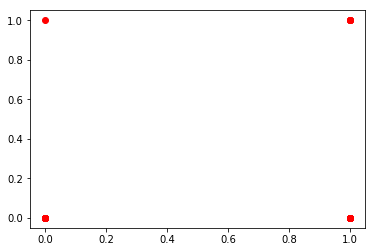

In [57]:
#plotting actual value and predicted values, it is cleary shown that there are some errors.
plt.plot(y_test,model.predict(x_test),'ro')

In [74]:
conm(y_train,model.predict(x_train))

array([[2581,    6],
       [ 452,   14]], dtype=int64)

In [75]:
conm(y_test,model.predict(x_test))

array([[638,   1],
       [120,   5]], dtype=int64)